# Data Prep and Exploratory Data Analysis

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read in the data.

In [2]:
categories = pd.read_excel('../data/raw/categories_assessment.xlsx', skiprows=-1)
training = pd.read_excel('../data/raw/training_data_assessment.xlsx')
validation = pd.read_excel('../data/raw/data_to_classify_assessment.xlsx')

## Categories

In [3]:
categories  # theses are the targets for the classifications, manually corrected the header issue in excel

,Categories
0,Headphones
1,Cables
2,Security & Surveillance
3,Streaming Media
4,Television Accessories
5,Monitor Risers
6,Gaming Accessories
7,Video Games
8,Video Cameras
9,3D Printers & Supplies


In [4]:
categories.describe()  # all unique, that's good

,Categories
count,63
unique,63
top,Two Way Radios
freq,1


In [5]:
categories['Categories'] = categories['Categories'].apply(lambda x: x.replace('&', 'and').replace(' ', '_').lower());  # make it easier to read

In [6]:
categories.to_csv('../data/processed/categories.csv')  # write to csv for convenience

In [7]:
categories

,Categories
0,headphones
1,cables
2,security_and_surveillance
3,streaming_media
4,television_accessories
5,monitor_risers
6,gaming_accessories
7,video_games
8,video_cameras
9,3d_printers_and_supplies


## Training Data

In [8]:
training.head()

,ASIN,CategoryName,BrandName,Title,ImageUrl
0,B014FCC4NO,Headphones,01 Audio,"Bluetooth Headphones, Wireless Earbuds Earphon...",http://ecx.images-amazon.com/images/I/31KpP1yO...
1,B00RE20CVO,Cables,1byone,1Byone Lightning to USB Cable 3.28ft (1M) for...,http://ecx.images-amazon.com/images/I/31cldYZD...
2,B00HEZV6AC,Security & Surveillance,1byone,1byone? 7 Inch Colorful LCD Screen Video Doorb...,http://ecx.images-amazon.com/images/I/41by3Sjc...
3,B00ZWOU5R2,Streaming Media,1byone,1byone 5GHz Wireless HDMI Streaming Media Play...,https://images-na.ssl-images-amazon.com/images...
4,B00RFLXE0A,Television Accessories,1byone,1byone Shiny Antenna Super Thin Amplified HDTV...,http://ecx.images-amazon.com/images/I/314oPMta...


From a quick Google search, __ASIN__ stands for _Amazon Standard Identification Number_

In [9]:
training.describe(include='all')

,ASIN,CategoryName,BrandName,Title,ImageUrl
count,6034,6034,6034,6034,6034
unique,6031,63,1480,6009,5774
top,B00DW7LB3I,Laptops,Samsung,KeylessOption Keyless Entry Remote Control Car...,http://ecx.images-amazon.com/images/I/41KHRFUc...
freq,2,100,155,3,22


It appears that there are some duplicate ASINs, so they need to be dropped.

In [10]:
training.drop_duplicates(subset=['ASIN'], keep='last', inplace=True)  # remove the duplicate ASINs

In [11]:
training.describe(include='all')

,ASIN,CategoryName,BrandName,Title,ImageUrl
count,6031,6031,6031,6031,6031
unique,6031,63,1480,6006,5774
top,B00CE3LHQW,Laptops,Samsung,KeylessOption Keyless Entry Remote Control Car...,http://ecx.images-amazon.com/images/I/41KHRFUc...
freq,1,100,155,3,22


Check the distribution of the categories.

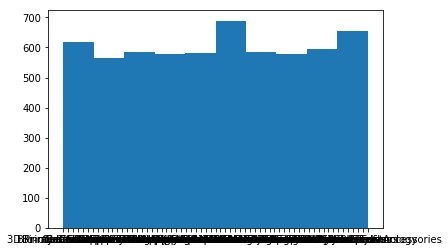

In [12]:
plt.hist(training['CategoryName']);

The number of examples for each category are fairly equal, alleviating the concerns of unbalanced classes.

Check the distribution of the brands.

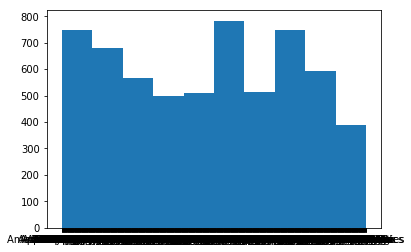

In [13]:
plt.hist(training['BrandName']);

There appears to be slight imbalance with the brands, but I don't foresee this shouldn't presenting too much of a problem.
The only thing that might be lost are brands with a well defined "brand aesthetic".

_Note for processing_: With the urls, I'll need to download the images, but having the category names makes it fairly simple to construct a dataset with directories and files for the training data. The directories will be the class labels (the product categories) and the filenames will be the ASIN, i.e. `<category>/<ASIN>.jpg`

The training data will be downloaded to `/tmp/training/<category>/` and the validation data to `/tmp/validation/`, but obviously without the `<category>` directories.

Checking the file types.

In [14]:
training['FileType'] = training['ImageUrl'].apply(lambda x: x.split('.')[-1])  # grab extension from the url

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.029e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

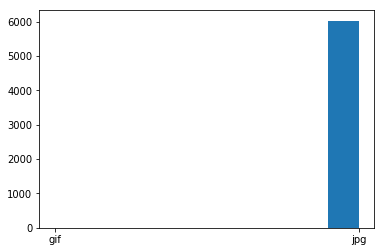

In [15]:
plt.hist(training['FileType'])

The overwhelming majority of the images are `.jpg`, thankfully. There are some `.gif` files though...

In [16]:
training['FileType'][training['FileType'] == 'gif'].values.shape  # how many gifs are there?

(2,)

In the interest of time and convenience for processing the images, I'm going to drop the `.gif` files.
Obviously I would not do this in a production setting, but with only 2 `.gif` files, they won't be contributing much to the analysis.

In [17]:
training.drop(training[training['FileType'] == 'gif'].index, inplace=True)  # drop the rows with .gif files

In [18]:
training.describe()

,ASIN,CategoryName,BrandName,Title,ImageUrl,FileType
count,6029,6029,6029,6029,6029,6029
unique,6029,63,1478,6004,5773,1
top,B00CE3LHQW,Laptops,Samsung,Nike+ Fuelband SE,http://ecx.images-amazon.com/images/I/41KHRFUc...,jpg
freq,1,100,155,3,22,6029


Adjust `CategoryName` to bring it in line with `categories.csv`, and drop the `FileType` feature.

In [19]:
training['CategoryName'] = training['CategoryName'].apply(lambda x: x.replace('&', 'and').replace(' ', '_').lower());

In [20]:
training['Category'] = pd.Categorical(training['CategoryName']).labels
training['FilePath'] = training[['ASIN', 'FileType']].apply(lambda x: '.'.join(x.astype(str)), axis=1)
training['FilePath'] = training[['CategoryName', 'FilePath']].apply(lambda x: '/'.join(x.astype(str)), axis=1)

In [21]:
training.drop(['FileType'], axis=1, inplace=True)  # there's no need for the FileType feature, except for exploration

In [30]:
training.head()

,ASIN,CategoryName,BrandName,Title,ImageUrl,Category,FilePath
0,B014FCC4NO,headphones,01 Audio,"Bluetooth Headphones, Wireless Earbuds Earphon...",http://ecx.images-amazon.com/images/I/31KpP1yO...,22,headphones/B014FCC4NO.jpg
1,B00RE20CVO,cables,1byone,1Byone Lightning to USB Cable 3.28ft (1M) for...,http://ecx.images-amazon.com/images/I/31cldYZD...,4,cables/B00RE20CVO.jpg
2,B00HEZV6AC,security_and_surveillance,1byone,1byone? 7 Inch Colorful LCD Screen Video Doorb...,http://ecx.images-amazon.com/images/I/41by3Sjc...,45,security_and_surveillance/B00HEZV6AC.jpg
3,B00ZWOU5R2,streaming_media,1byone,1byone 5GHz Wireless HDMI Streaming Media Play...,https://images-na.ssl-images-amazon.com/images...,47,streaming_media/B00ZWOU5R2.jpg
4,B00RFLXE0A,television_accessories,1byone,1byone Shiny Antenna Super Thin Amplified HDTV...,http://ecx.images-amazon.com/images/I/314oPMta...,52,television_accessories/B00RFLXE0A.jpg


In [23]:
training.to_csv('../data/processed/training_labels.csv')

## Validation

I'll return to this after working with the downloading...

In [24]:
validation['FileType'] = validation['ImageUrl'].apply(lambda x: x.split('.')[-1])  # get extension from the url

In [25]:
validation['FileType'][validation['FileType'] == 'gif'].values.shape  # how many gifs are there?

(62,)

In [26]:
validation.drop(validation[validation['FileType'] == 'gif'].index, inplace=True)  # drop the rows with .gif files

In [27]:
validation['FilePath'] = validation[['ASIN', 'FileType']].apply(lambda x: '.'.join(x.astype(str)), axis=1)

In [28]:
validation.head()

,ASIN,BrandName,Title,ImageUrl,FileType,FilePath
0,B005DIRI6I,Portta,Portta Digital Coaxial Toslink to Analog (L/R)...,http://ecx.images-amazon.com/images/I/01KGAAk9...,jpg,B005DIRI6I.jpg
1,B000OYR9S8,Savage,Savage SV-107X12-56 Seamless Background Paper ...,http://ecx.images-amazon.com/images/I/01OWR5or...,jpg,B000OYR9S8.jpg
2,B00WT9UV3Q,Avtech,AVTech AVS228 8CH HD-SDI DVR,http://ecx.images-amazon.com/images/I/11%2BWuk...,jpg,B00WT9UV3Q.jpg
3,B010F69FRC,Dahua,Dahua NVR4416-P / EX-NVRDR-P Dual Core CPU - 1...,http://ecx.images-amazon.com/images/I/111McGzd...,jpg,B010F69FRC.jpg
4,B00U4S0FE4,HP,HP KVM Console G3 Switch 0x1x8 - 8 Ports - USB...,http://ecx.images-amazon.com/images/I/112CVCFg...,jpg,B00U4S0FE4.jpg


In [29]:
validation.to_csv('../data/processed/validation.csv')  # all good here...